In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

pd.set_option("display.max_columns", 100)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics


In [2]:
# Importing the DataSets
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Let's look at the columns name format, whethere they are in correct or not.
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

**There are spaces and uppercase, lets just change it for ease of use**

In [6]:
df.rename(columns= lambda x:x.strip().replace(' ','_').casefold(),inplace= True)

In [7]:
df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [8]:
df.isnull().sum()

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   1438
how_did_you_hear_about_x_education               2207
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article           

In [9]:
# Checking Duplicates
any(df.duplicated())

False

## Data Cleaning

Since we have read the data and had our initial inspection. It is seen that there are many columns with the value "Select" entered in the data. This "select" is not a relevant information and needs some tweaking. Hence we shall convert all the "Select" data entries to "NaN"

In [10]:
column_list = list(df.columns)
for i in column_list:
    df.loc[df[i]=='Select',i]= np.nan

In [11]:
df.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,country,specialization,how_did_you_hear_about_x_education,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,tags,lead_quality,update_me_on_supply_chain_content,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737.0,API,Olark Chat,No,No,0.0,0.0,0.0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728.0,API,Organic Search,No,No,0.0,5.0,674.0,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727.0,Landing Page Submission,Direct Traffic,No,No,1.0,2.0,1532.0,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719.0,Landing Page Submission,Direct Traffic,No,No,0.0,1.0,305.0,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681.0,Landing Page Submission,Google,No,No,1.0,2.0,1428.0,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
df.prospect_id.is_unique

True

In [13]:
any(df.duplicated())

False

**Treating Missing and null Values**

In [14]:
# checking numbers of missing values in each columns
df.isnull().sum()

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   3380
how_did_you_hear_about_x_education               7250
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article           

In [15]:
# lets check null value counts
len(df.columns[df.isnull().sum()/len(df)*100 < 40])

30

In [16]:
# List of columns that have more than 40% missing values
df.columns[df.isnull().sum()/len(df)*100>40]

Index(['how_did_you_hear_about_x_education', 'lead_quality', 'lead_profile',
       'asymmetrique_activity_index', 'asymmetrique_profile_index',
       'asymmetrique_activity_score', 'asymmetrique_profile_score'],
      dtype='object')

**We have around 7 columns with more than 40% null/missing values. The list is as seen above**

In [17]:
# Let's Check no.of missing values in each columns
df.isnull().sum()

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   3380
how_did_you_hear_about_x_education               7250
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article           

In [18]:
# Let's check percentage of the missing values in each columns
round(100*(df.isnull().sum()/len(df.index)), 2)

prospect_id                                       0.00
lead_number                                       0.00
lead_origin                                       0.00
lead_source                                       0.39
do_not_email                                      0.00
do_not_call                                       0.00
converted                                         0.00
totalvisits                                       1.48
total_time_spent_on_website                       0.00
page_views_per_visit                              1.48
last_activity                                     1.11
country                                          26.63
specialization                                   36.58
how_did_you_hear_about_x_education               78.46
what_is_your_current_occupation                  29.11
what_matters_most_to_you_in_choosing_a_course    29.32
search                                            0.00
magazine                                          0.00
newspaper_

We have taken a reference of 40%.
So Dropping off the above columns with more than 40% missing values we will now create a new dataframe named df1

In [19]:
df1 = df[['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'city', 'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity']]

In [20]:
df1.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,country,specialization,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,tags,update_me_on_supply_chain_content,get_updates_on_dm_content,city,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737.0,API,Olark Chat,No,No,0.0,0.0,0.0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728.0,API,Organic Search,No,No,0.0,5.0,674.0,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727.0,Landing Page Submission,Direct Traffic,No,No,1.0,2.0,1532.0,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719.0,Landing Page Submission,Direct Traffic,No,No,0.0,1.0,305.0,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681.0,Landing Page Submission,Google,No,No,1.0,2.0,1428.0,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [21]:
df1.shape

(9240, 30)

The purpose of the model is to find the most probable convertable customers, so the information i,e variables related to sales team are of no use while making the model, as model is to be built before the sales team reach out to the customer.

so let's drop the sales related variables (filled by sales team after reaching customer).

In [22]:
sales_cols = ['last_activity','last_notable_activity','tags']

In [23]:
df1.drop(sales_cols,axis='columns',inplace=True)

In [24]:
# Also lets drop prospect id, and lead number too, as it has no use 
df1.drop(['prospect_id','lead_number'],axis='columns',inplace=True)

Lets check the remaining missing values and how we can treat them inorder to build a good predictive model.

In [25]:
# checking percentage of the missing values in each columns
round(100*(df1.isnull().sum()/len(df1.index)), 2)

lead_origin                                       0.00
lead_source                                       0.39
do_not_email                                      0.00
do_not_call                                       0.00
converted                                         0.00
totalvisits                                       1.48
total_time_spent_on_website                       0.00
page_views_per_visit                              1.48
country                                          26.63
specialization                                   36.58
what_is_your_current_occupation                  29.11
what_matters_most_to_you_in_choosing_a_course    29.32
search                                            0.00
magazine                                          0.00
newspaper_article                                 0.00
x_education_forums                                0.00
newspaper                                         0.00
digital_advertisement                             0.00
through_re

In [26]:
#individually checking no.of missing values in each columns and deciding how to treat them 
df1.isnull().sum()

lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
country                                          2461
specialization                                   3380
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article                                   0
x_education_forums                                  0
newspaper                                           0
digital_advertisement                               0
through_recommendations     

In [27]:
df1["lead_source"].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: lead_source, dtype: int64

In [28]:
df1["lead_source"].isnull().sum() 

36

In this dataset, There are many catagories having less than 10 entries, they all seem some sort of social media lets club them all including Facebook under one new category called 'social media and others'

In [29]:
var = ['Facebook', 'bing', 'google',
       'Click2call', 'Live Chat', 'Social Media', 'Press_Release',
       'youtubechannel', 'WeLearn', 'blog', 'testone', 'NC_EDM',
       'Pay per Click Ads', 'welearnblog_Home']

In [30]:
for i in range(len(df['lead_source'])):
    if df1['lead_source'][i] in var:
        df1['lead_source'][i] = df1['lead_source'][i].replace(df1['lead_source'][i],'Social Media & Others') 

In [31]:
df1.lead_source.value_counts(dropna=False)

Google                   2868
Direct Traffic           2543
Olark Chat               1755
Organic Search           1154
Reference                 534
Welingak Website          142
Referral Sites            125
Social Media & Others      83
NaN                        36
Name: lead_source, dtype: int64

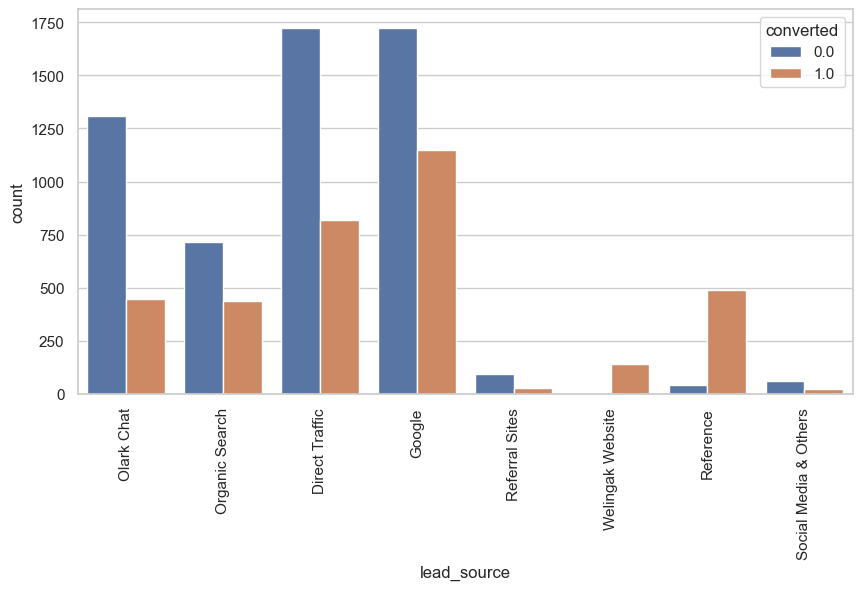

In [32]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
s1=sns.countplot(x= df1.lead_source, hue=df1.converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

lead_origin definitely has a lot of stories to tell. We shall look into this in much detail what cleaning the entire data set

Lets start handling the columns with higher missing values.

In [33]:
df1['country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [34]:
df1['country'].isnull().sum()

2461

In [35]:
gulf_var= ['United Arab Emirates','Saudi Arabia','Qatar','Bahrain','Oman','Kuwait']

for i in range(len(df1)):
    if df1.country[i] in gulf_var:
        df1.country[i] = 'gulf_country'
        
european_var = ['United Kingdom','France','Germany','Sweden','Belgium','Netherlands','Switzerland','Denmark']

for i in range(len(df1)):
    if df1.country[i] in european_var:
        df1.country[i] = 'european_country'
        
other_var=list(df1.country.value_counts()[df1.country.value_counts() < 34].index)
for i in range(len(df1)):
    if df1.country[i] in other_var:
        df1.country[i] = 'other_country'

In [36]:
df1["country"].value_counts(dropna=False)

India               6492
NaN                 2461
gulf_country         101
other_country         83
United States         69
european_country      34
Name: country, dtype: int64

**As a normal treatment, we impute the missing data with most occuring country (India), since we have data of city available, let's cross verify that...**

In [37]:
df1.country[df1.city=='Mumbai'].value_counts()

India               2918
gulf_country          32
United States         30
other_country         20
european_country      11
Name: country, dtype: int64

In [38]:
df1.country[df1.city=='Other Cities of Maharashtra'].value_counts()

India               391
gulf_country          7
other_country         6
european_country      5
United States         5
Name: country, dtype: int64

We can see there are a few discrepancies in our data. A few customers have entered the wrong cities, eg. a customer from a European country has put the city as Mumbai. Therefore we shall hold the country variable as it is for now and check the city variable.

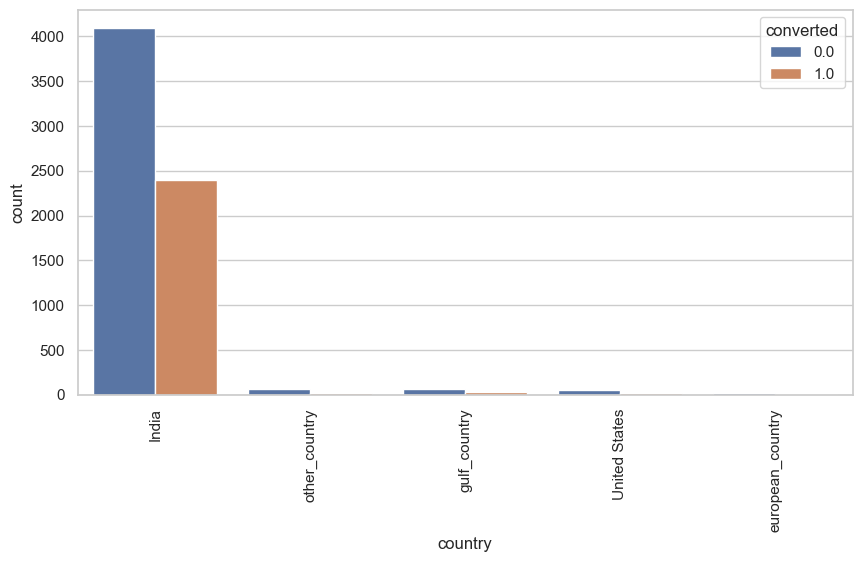

In [39]:
plt.figure(figsize=(10,5))
s2=sns.countplot(x=df1.country, hue=df1.converted)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.show()

In [40]:
df1["city"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: city, dtype: int64

In [41]:
(3222+752)/len(df)*100

43.00865800865801

To simplify the model building process, we can further club given categories into 3 basic categories namely ' Mumbai',' Other cities', and 'Other metro cities', where, Other cities will include 'Thane & Outskirts', 'Other Cities of Maharashtra', 'Tier II Cities'

In [42]:
df1.city[df1.city=='Thane & Outskirts']='Other Cities'
df1.city[df1.city=='Other Cities of Maharashtra']='Other Cities'
df1.city[df1.city=='Tier II Cities']='Other Cities'

In [43]:
# looking for missing values
df1["city"].isnull().sum()

3669

We still need to tackle the null values. Let's try a different approach here.

The hurdle in imputing these missing values is that we cannot blindly give them a category based on the highest occurring city. Since we have a column named 'country' we will need to transfer the cities to categories on a conditional basis, hence, the missing values having Countries other than India can be transferred to 'Other Cities' and the remaining can be allotted 'Mumbai' as Mumbai is the most occurring city.

Inorder to tackle the complexity of these 2 variables. We shall now change the null values to a string 'Unknown'

In [44]:
df1.city[df1.city.isna()]='Unknown'

In [45]:
df1.city.value_counts(dropna=False)

Unknown               3669
Mumbai                3222
Other Cities          1969
Other Metro Cities     380
Name: city, dtype: int64

In [46]:
for i in range(len(df1)):
    if df1.city[i]=="Unknown" and df1.country[i]=='India':
        df1.city[i]='Mumbai'
        
for i in range(len(df1)):
    if df1.city[i]=="Unknown" and df1.country[i]=='gulf_country':
        df1.city[i]='Other Cities'
        
for i in range(len(df1)):
    if df1.city[i]=="Unknown" and df1.country[i]=='United States':
        df1.city[i]='Other Cities'
        
for i in range(len(df1)):
    if df1.city[i]=="Unknown" and df1.country[i]=='european_country':
        df1.city[i]='Other Cities'
        
for i in range(len(df1)):
    if df1.city[i]=="Unknown" and df1.country[i]=='other_country':
        df1.city[i]='Other Cities'

In [47]:
df1.city.value_counts(dropna=False)

Mumbai                4776
Unknown               2055
Other Cities          2029
Other Metro Cities     380
Name: city, dtype: int64

We have successfully sorted the cities based on the available country information. We are still left with another 2097 Unknown/Null values. We will replace it with Mumbai as Mumbai is the most frequently occurring City in this dataset.

In [48]:
df1.city[df1.city=='Unknown']= 'Mumbai'

In [49]:
df1.city.value_counts()

Mumbai                6831
Other Cities          2029
Other Metro Cities     380
Name: city, dtype: int64

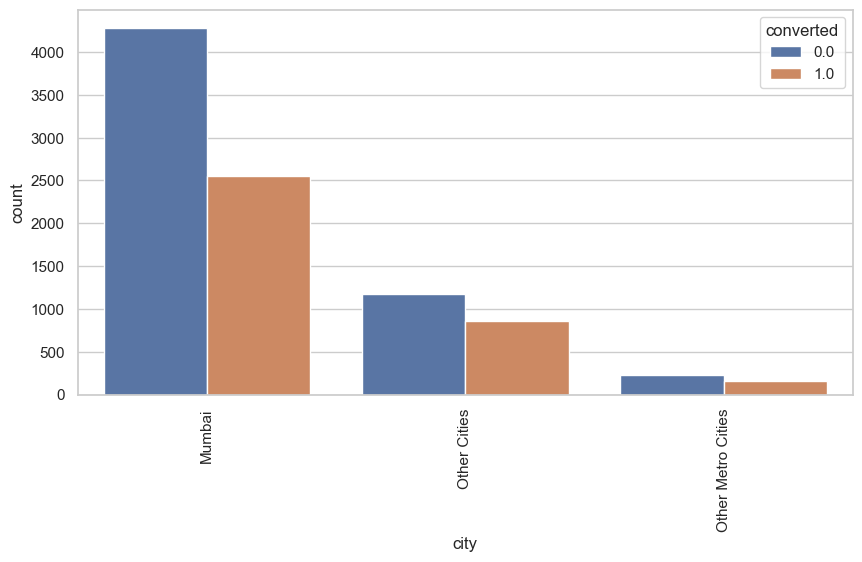

In [50]:
plt.figure(figsize=(10,5))
s3=sns.countplot(x=df1.city, hue=df1.converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

The City variable looks better and hopefully will help in a better model-building process.

We are going back to the country variable, which can not be tweaked like the city variable. The only option would be to change the entire missing value to the most recurring country which happens to be India. India already has '6492' entries adding the missing '2461' which makes India have 97% of the values. By doing so we will be further creating unbalanced data which will not help in our model building. Hence; as the country and city variables are both associated with the geographical location of the candidate, we can drop the country column and retain the city column for our further analysis.

In [51]:
df1.drop(["country"],axis='columns',inplace=True)

In [52]:
df1.shape

(9240, 24)

In [53]:
df1["specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: specialization, dtype: int64

In [54]:
df1["specialization"].isnull().sum()

3380

This is a good indicator, also other looks well-balanced. There is a possibility that the person did not find his/her specialization in the list given below causing the missing values. We can't assign them to the most occured one here and there are no connecting data from which we can derive some idea as to what would their specization be. Hence, let's create a category 'other' and put them in it.

In [55]:
df1.specialization.replace(np.nan,'Other',inplace=True)

In [56]:
df1.specialization.value_counts() 

Other                                3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: specialization, dtype: int64

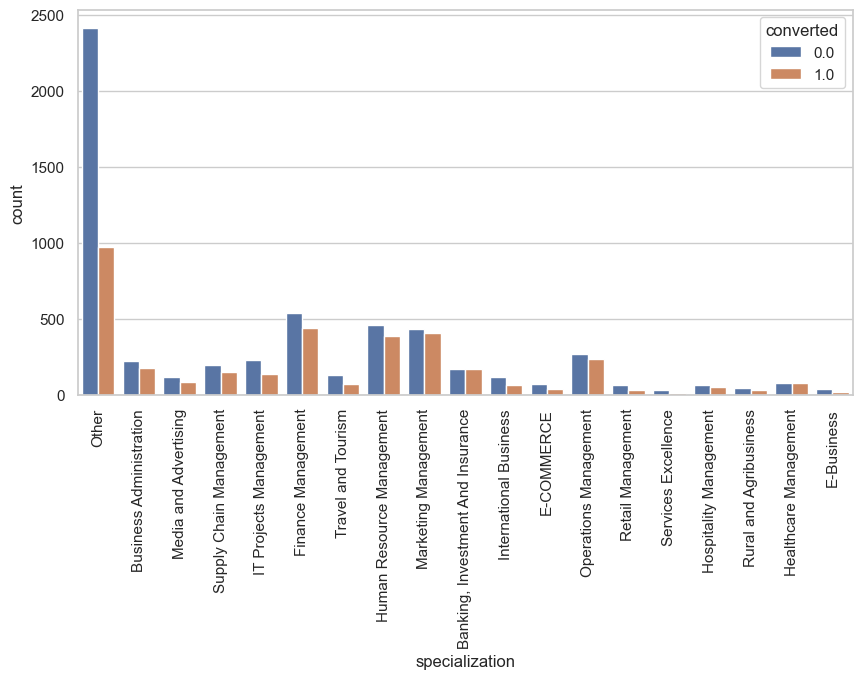

In [57]:
plt.figure(figsize=(10,5))
s4=sns.countplot(x= df1.specialization, hue=df1.converted)
s4.set_xticklabels(s4.get_xticklabels(),rotation=90)
plt.show()

In [58]:
df1["what_is_your_current_occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: what_is_your_current_occupation, dtype: int64

In [59]:
df1["what_is_your_current_occupation"].isnull().sum()

2690

Here, there is an option of 'other', still customers haven't chosen that option, and maybe they were not willing or interested in disclosing it. As of now, as 60.0% of the customers are unemployed, we can impute them as 'unemployed', But since this company focuses on providing higher education, a person could be either unemployed or a working professional or student(most likely final year) Let's just take these 3 categories and impute them in random.

In [60]:
import random

random_occupation = ['Unemployed','Working Professional','Student']
df1.what_is_your_current_occupation.replace(np.nan,'NaN',inplace=True)
for i in range(len(df1)):
    if df1.what_is_your_current_occupation[i]=='NaN':
        var = random.choice(random_occupation)
        df1.what_is_your_current_occupation[i] = df1.what_is_your_current_occupation[i].replace(df1.what_is_your_current_occupation[i], var)

In [61]:
df1.what_is_your_current_occupation.value_counts()

Unemployed              6481
Working Professional    1601
Student                 1124
Other                     16
Housewife                 10
Businessman                8
Name: what_is_your_current_occupation, dtype: int64

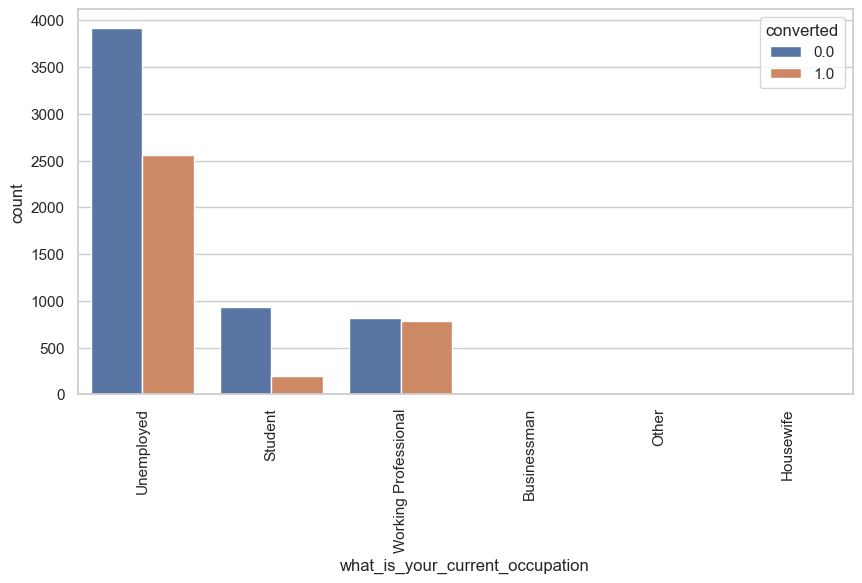

In [62]:
plt.figure(figsize=(10,5))
s5=sns.countplot(x = df1.what_is_your_current_occupation, hue=df1.converted)
s5.set_xticklabels(s5.get_xticklabels(),rotation=90)
plt.show()

In [63]:
df1["what_matters_most_to_you_in_choosing_a_course"].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: what_matters_most_to_you_in_choosing_a_course, dtype: int64

This is once again highly skewed data 'Better career..' has 70% of the values and others have total entries 3 and nearly 2709 null values. if we impute the missing values with the most occurring value this data is not of any great use for the model-building process as this will not serve as an indicator variable to identify the hot leads.

Therefore this column can dropped right away without carrying it further.

In [64]:
df1.drop("what_matters_most_to_you_in_choosing_a_course", axis='columns',inplace=True)

Some other variables that do not have null values but might need to be handled.

In [65]:
print(df1.search.value_counts(dropna=False))
print(df1.magazine.value_counts(dropna=False))
print(df1.x_education_forums.value_counts(dropna=False))
print(df1.newspaper.value_counts(dropna=False))
print(df1.newspaper_article.value_counts(dropna=False))
print(df1.digital_advertisement.value_counts(dropna=False))
print(df1.through_recommendations.value_counts(dropna=False))

# Some other columns deviced to initiate communication with the customer.

print(df1.receive_more_updates_about_our_courses.value_counts(dropna=False))
print(df1.update_me_on_supply_chain_content.value_counts(dropna=False))
print(df1.get_updates_on_dm_content.value_counts(dropna=False))
print(df1.i_agree_to_pay_the_amount_through_cheque.value_counts(dropna=False))


No     9226
Yes      14
Name: search, dtype: int64
No    9240
Name: magazine, dtype: int64
No     9239
Yes       1
Name: x_education_forums, dtype: int64
No     9239
Yes       1
Name: newspaper, dtype: int64
No     9238
Yes       2
Name: newspaper_article, dtype: int64
No     9236
Yes       4
Name: digital_advertisement, dtype: int64
No     9233
Yes       7
Name: through_recommendations, dtype: int64
No    9240
Name: receive_more_updates_about_our_courses, dtype: int64
No    9240
Name: update_me_on_supply_chain_content, dtype: int64
No    9240
Name: get_updates_on_dm_content, dtype: int64
No    9240
Name: i_agree_to_pay_the_amount_through_cheque, dtype: int64


1. All of them no null values here
2. Most of them have only NO as a response.
3. Strangely nobody seems to have seen any ad in search, magazine, newspaper, or newspaper article, digital_advertising there is no point in keeping these columns.
4. Though we have many leads through reference, the column through_recommendations seems to have very few 'Yes' which is unusual to use.
5. Most of the columns seemed extremely skewed in information. Hence, it is best to drop them all.

In [66]:
# A free copy of Mastering the interview
df1.a_free_copy_of_mastering_the_interview.value_counts(normalize=True,dropna=False)*100

No     68.744589
Yes    31.255411
Name: a_free_copy_of_mastering_the_interview, dtype: float64

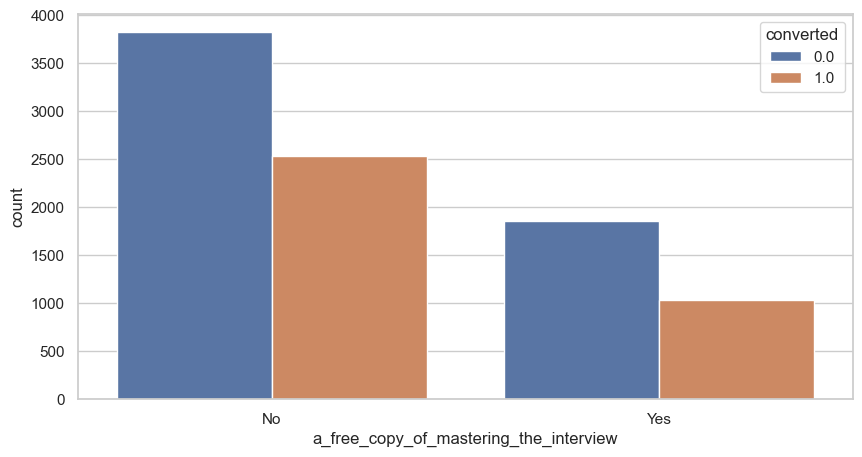

In [67]:
plt.figure(figsize=(10,5))
s6=sns.countplot(x=df1.a_free_copy_of_mastering_the_interview, hue=df1.converted)
s6.set_xticklabels(s6.get_xticklabels())
plt.show()

**A good 68-32 separation with no null values, may be one of the deciding factors in our model. Despite having a 68% NO selected, a good proportion has been converted, and definitely the non-converter customers who have**

In [68]:
# Dropping all of the above columns that seem irrelevant from the data perspective. 

df1.drop(['search','magazine', 'x_education_forums','newspaper','newspaper_article','digital_advertisement','through_recommendations', 'receive_more_updates_about_our_courses', 'update_me_on_supply_chain_content', 'get_updates_on_dm_content', 'i_agree_to_pay_the_amount_through_cheque'],axis='columns',inplace=True)



In [69]:
print(df1.lead_origin.value_counts(dropna = False))

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: lead_origin, dtype: int64


In [70]:
# Add form has only 1 entry, 
# lets impute it with most occuring one

df1.lead_origin[df.lead_origin=='Quick Add Form']='Landing Page Submission'
df1.lead_origin.value_counts(dropna = False)

Landing Page Submission    4887
API                        3580
Lead Add Form               718
Lead Import                  55
Name: lead_origin, dtype: int64

In [71]:
df1.do_not_email.value_counts() 

No     8506
Yes     734
Name: do_not_email, dtype: int64

**It seems fair to me**

In [72]:
# Do not call 

df1.do_not_call.value_counts()

No     9238
Yes       2
Name: do_not_call, dtype: int64

**This is highly imbalanced column, lets just drop this column as it has 99%+ same value**

In [73]:
# Those who say do not call or mail have spent a good time on the website might have a high conversion rate
df1.drop('do_not_call', axis='columns',inplace=True)

In [74]:
# Cross checking
'do_not_call' in df1.columns

False

In [75]:
df1.shape

(9240, 11)

In [76]:
df1.head(10)

,lead_origin,lead_source,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,specialization,what_is_your_current_occupation,city,a_free_copy_of_mastering_the_interview
0,API,Olark Chat,No,0.0,0.0,0.0,0.0,Other,Unemployed,Mumbai,No
1,API,Organic Search,No,0.0,5.0,674.0,2.5,Other,Unemployed,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,1.0,2.0,1532.0,2.0,Business Administration,Student,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0.0,1.0,305.0,1.0,Media and Advertising,Unemployed,Mumbai,No
4,Landing Page Submission,Google,No,1.0,2.0,1428.0,1.0,Other,Unemployed,Mumbai,No
5,API,Olark Chat,No,0.0,0.0,0.0,0.0,Other,Student,Mumbai,No
6,Landing Page Submission,Google,No,1.0,2.0,1640.0,2.0,Supply Chain Management,Unemployed,Mumbai,No
7,API,Olark Chat,No,0.0,0.0,0.0,0.0,Other,Unemployed,Mumbai,No
8,Landing Page Submission,Direct Traffic,No,0.0,2.0,71.0,2.0,IT Projects Management,Working Professional,Other Cities,Yes
9,API,Google,No,0.0,4.0,58.0,4.0,Finance Management,Student,Mumbai,No


count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: totalvisits, dtype: float64


<Axes: >

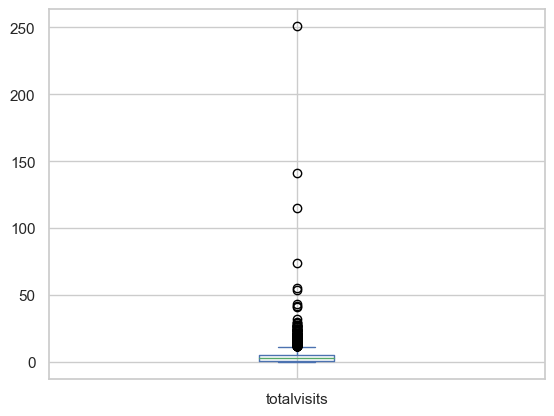

In [77]:
# Total Visits
print (df1.totalvisits.describe())
df1.totalvisits.plot.box()

Totalvisits seems to have too many outliers making the data extremely skewed. Every person has a different method of making a decision some of them quickly decide and some take months, years, and a lot of research. Total visits is one such column where a few have visited the website several times. the average visit by the customers is less than 5 times. Therefore considering a few exceptions, we will keep the total visits bench mark less than 30 and delete those above 30 visits.

In [78]:
df1 = df1[~(df1.totalvisits > 30)]

<Axes: >

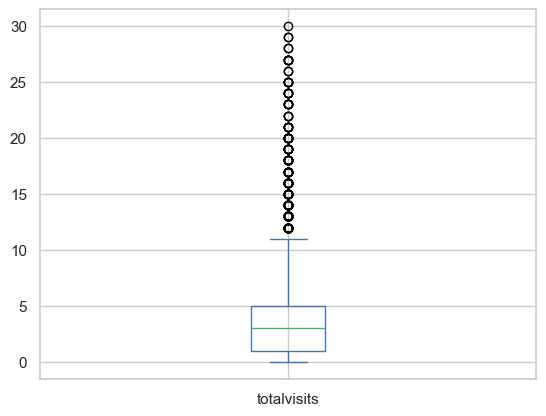

In [79]:
df1.totalvisits.plot.box()

**It looks consistent,Let's move to next**

In [80]:
df1.totalvisits.isnull().sum()

137

There are 137 records which have null values. This is a numeric column, let's impute these records with median

In [81]:
df1.totalvisits.replace(np.nan,df1.totalvisits.median(),inplace=True)
df1.totalvisits.isnull().sum()

0

In [82]:
df1.totalvisits.describe()

count    9230.000000
mean        3.350488
std         3.394736
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        30.000000
Name: totalvisits, dtype: float64

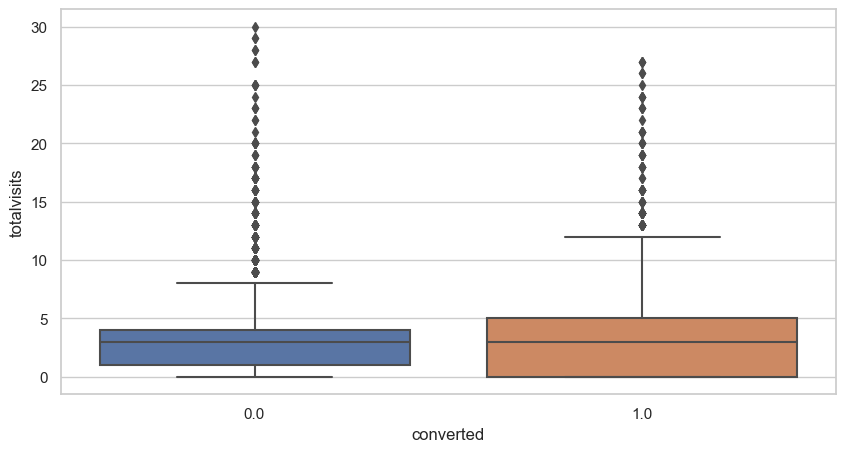

In [83]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1.converted, y=df1['totalvisits'])
plt.show()

In [84]:
df1.shape

(9230, 11)

In [85]:
# total time spent on website
df1.total_time_spent_on_website.describe(percentiles=[.25, .5, .75,.95,.99])

count    9230.000000
mean      487.650379
std       548.080646
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
95%      1562.000000
99%      1840.710000
max      2272.000000
Name: total_time_spent_on_website, dtype: float64

In [86]:
df1.total_time_spent_on_website.isnull().sum()

0

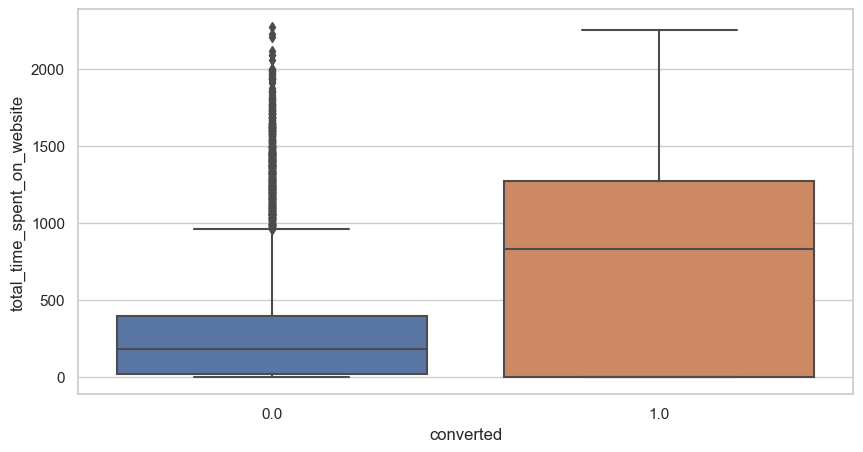

In [87]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1.converted, y=df1['total_time_spent_on_website'])
plt.show()

This clearly states that those who spend a considerable amount of time on the website can be our hot leads.

<Axes: >

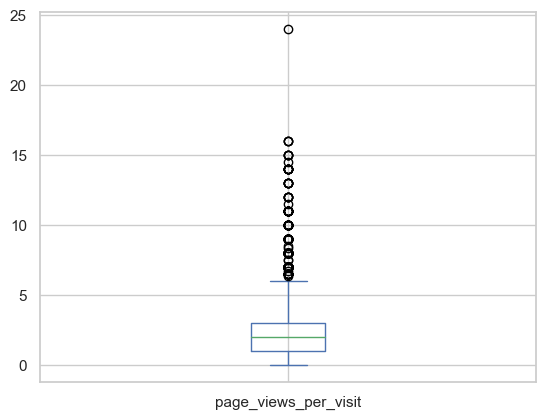

In [88]:
# Page views per visit
df1.page_views_per_visit.plot.box()

looks good enough too, that furthest guy has actually been converted and is a genuine entry,but not good for generalizing as it is just 1 entry

In [89]:
df1.page_views_per_visit.describe(percentiles=[.95,.97,.99])

count    9093.000000
mean        2.354544
std         2.086626
min         0.000000
50%         2.000000
95%         6.000000
97%         7.000000
99%         9.000000
max        24.000000
Name: page_views_per_visit, dtype: float64

In [90]:
df1.page_views_per_visit[df1.page_views_per_visit > 9].shape

(73,)

**lets keep only those records which are under 99%**

In [91]:
df1.page_views_per_visit=df1.page_views_per_visit[df1.page_views_per_visit < 9]

In [92]:
df1.page_views_per_visit.describe(percentiles=[.95,.97,.99])


count    8975.000000
mean        2.243440
std         1.841086
min         0.000000
50%         2.000000
95%         6.000000
97%         6.000000
99%         7.130000
max         8.500000
Name: page_views_per_visit, dtype: float64

In [93]:
# Checking null values
df1.page_views_per_visit.isnull().sum()

255

just 255 records, 2.5% let's impute them with median value, as mean and median are closer

In [94]:
df1.page_views_per_visit.replace(np.nan,df1.page_views_per_visit.median(),inplace=True)
df1.shape

(9230, 11)

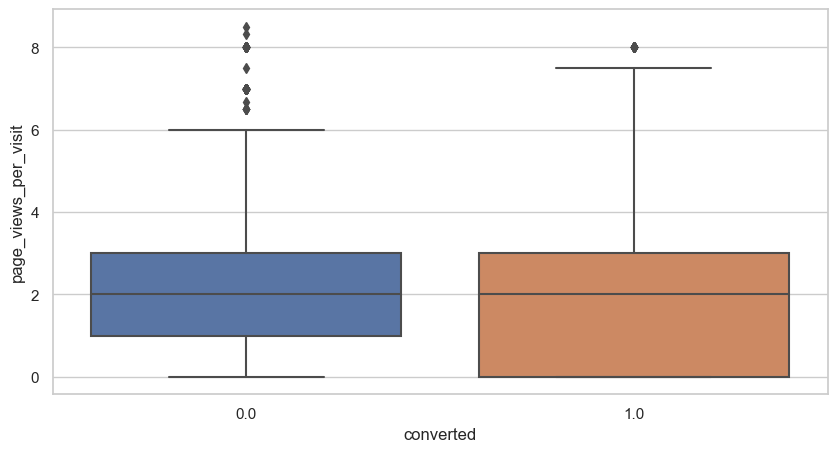

In [95]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1.converted, y=df1['page_views_per_visit'])
plt.show()

In [96]:
#Let's convert

df1.converted.value_counts()


0.0    5670
1.0    3560
Name: converted, dtype: int64

In [97]:
df1.converted=df1.converted.astype(int) #just for the sake of algorithm
sum(df1['converted'])/len(df1['converted'].index)*100 #checking the percentage of converted customers in our existing dataset.

38.569880823401945

**These were all the imputations that needed to be done, going column by column, let's check our data**

In [98]:
# check the columns 
df1.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'converted',
       'totalvisits', 'total_time_spent_on_website', 'page_views_per_visit',
       'specialization', 'what_is_your_current_occupation', 'city',
       'a_free_copy_of_mastering_the_interview'],
      dtype='object')

In [99]:
df1.isnull().sum()

lead_origin                                0
lead_source                               36
do_not_email                               0
converted                                  0
totalvisits                                0
total_time_spent_on_website                0
page_views_per_visit                       0
specialization                             0
what_is_your_current_occupation            0
city                                       0
a_free_copy_of_mastering_the_interview     0
dtype: int64

In [100]:
df1.dropna(inplace=True)

In [101]:
df1.isnull().sum()

lead_origin                               0
lead_source                               0
do_not_email                              0
converted                                 0
totalvisits                               0
total_time_spent_on_website               0
page_views_per_visit                      0
specialization                            0
what_is_your_current_occupation           0
city                                      0
a_free_copy_of_mastering_the_interview    0
dtype: int64

In [102]:
df1.reset_index(drop=True,inplace=True)
df1.shape

(9194, 11)

## Data visualization

### Visualizing Numerical variable¶

Checking correlation between the numerical variables presnet in the dataset.

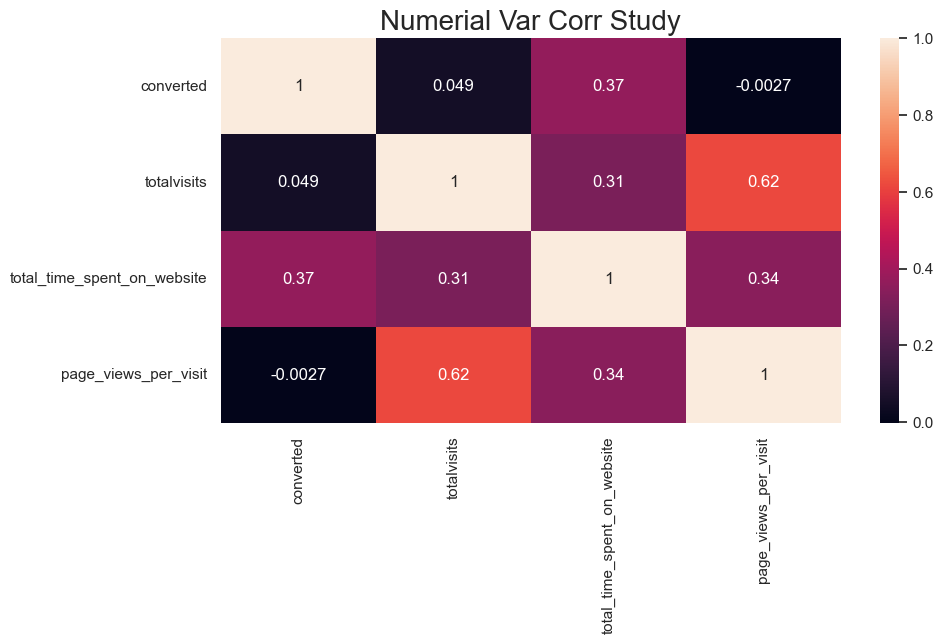

In [103]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot=True)
plt.title("Numerial Var Corr Study", fontsize =20)
plt.show()

**Observation about the numerical variable**
1. totalvisits and page_views_per_visit have multicollinearity. As we move ahead we can decide if any of them needs to be dropped.
2. While totalvisits are positively correlated with converted. The page_views_per_visit variable has a negative correlation with the converted.

### Univariate Analysis

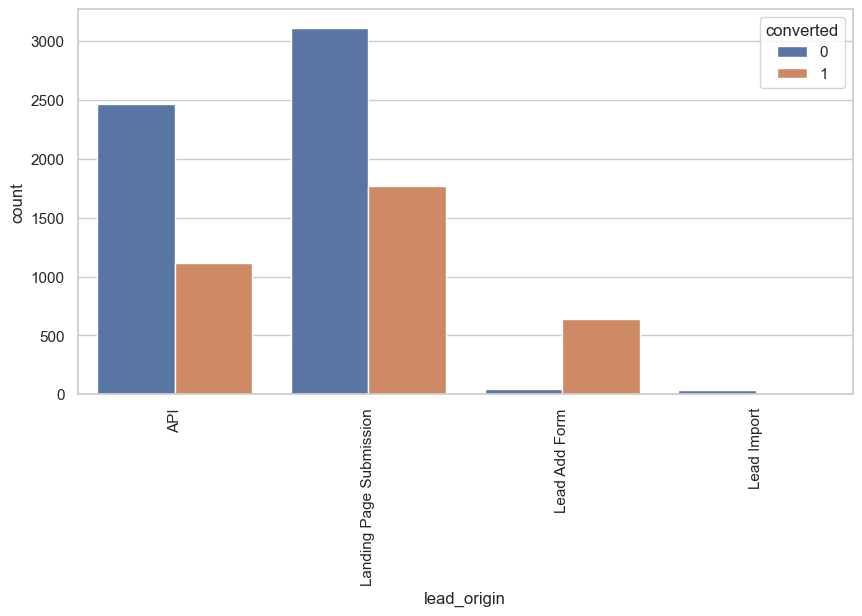

In [104]:
# Lead origin
plt.figure(figsize=(10,5))
s8=sns.countplot(x=df1.lead_origin, hue=df1.converted)
s8.set_xticklabels(s8.get_xticklabels(),rotation=90)
plt.show()

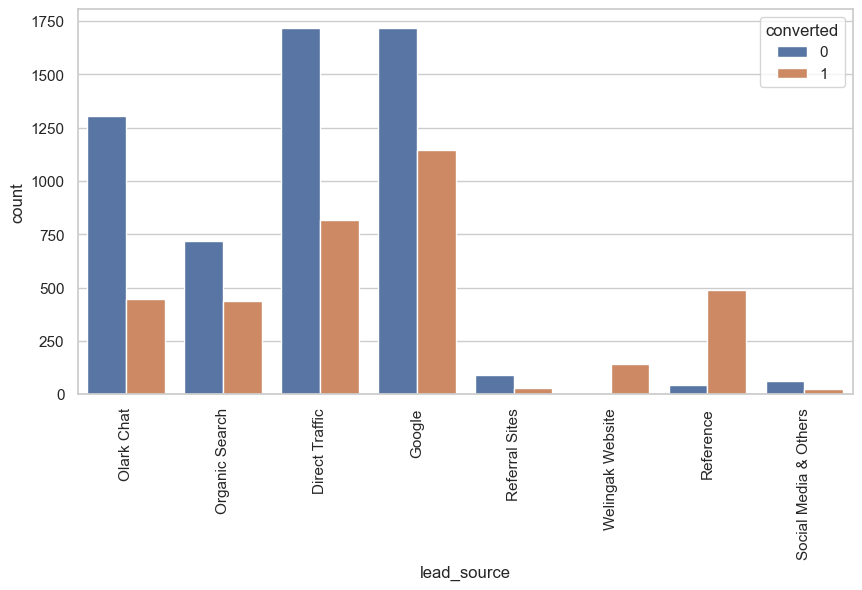

In [105]:
#lead source
plt.figure(figsize=(10,5))
s9=sns.countplot(x=df1.lead_source, hue=df1.converted)
s9.set_xticklabels(s9.get_xticklabels(),rotation=90)
plt.show()

In [106]:
df1.head(10)

,lead_origin,lead_source,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,specialization,what_is_your_current_occupation,city,a_free_copy_of_mastering_the_interview
0,API,Olark Chat,No,0,0.0,0.0,0.0,Other,Unemployed,Mumbai,No
1,API,Organic Search,No,0,5.0,674.0,2.5,Other,Unemployed,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532.0,2.0,Business Administration,Student,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305.0,1.0,Media and Advertising,Unemployed,Mumbai,No
4,Landing Page Submission,Google,No,1,2.0,1428.0,1.0,Other,Unemployed,Mumbai,No
5,API,Olark Chat,No,0,0.0,0.0,0.0,Other,Student,Mumbai,No
6,Landing Page Submission,Google,No,1,2.0,1640.0,2.0,Supply Chain Management,Unemployed,Mumbai,No
7,API,Olark Chat,No,0,0.0,0.0,0.0,Other,Unemployed,Mumbai,No
8,Landing Page Submission,Direct Traffic,No,0,2.0,71.0,2.0,IT Projects Management,Working Professional,Other Cities,Yes
9,API,Google,No,0,4.0,58.0,4.0,Finance Management,Student,Mumbai,No


### Data Preparation

#### Creating Dummy Variable

In [107]:
col_dummy = df1.select_dtypes(include=['object']).columns
col_dummy

Index(['lead_origin', 'lead_source', 'do_not_email', 'specialization',
       'what_is_your_current_occupation', 'city',
       'a_free_copy_of_mastering_the_interview'],
      dtype='object')

**Converting some binary variables (Yes/No) to 0/1**

In [108]:
varlist = ['a_free_copy_of_mastering_the_interview','do_not_email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the var list
df1[varlist] = df1[varlist].apply(binary_map)

In [109]:
#Specialization
dummy = pd.get_dummies(df1['specialization'], prefix  = 'specialization')
dummy = dummy.drop(['specialization_Other'], 1)
df1 = pd.concat([df1, dummy], axis = 1)

#what_is_your_current_occupation
dummy = pd.get_dummies(df1['what_is_your_current_occupation'], prefix  = 'what_is_your_current_occupation')
dummy = dummy.drop(['what_is_your_current_occupation_Other'], 1)
df1 = pd.concat([df1, dummy], axis = 1)

#city
dummy = pd.get_dummies(df1['city'], prefix  = 'city')
dummy = dummy.drop(['city_Other Metro Cities'], 1)
df1 = pd.concat([df1, dummy], axis = 1)

#lead_origin
dummy = pd.get_dummies(df1['lead_origin'], prefix  = 'lead_origin')
dummy = dummy.drop(['lead_origin_Lead Import'], 1)
df1 = pd.concat([df1, dummy], axis = 1)

#lead_source
dummy = pd.get_dummies(df1['lead_source'], prefix  = 'lead_source')
dummy = dummy.drop(['lead_source_Social Media & Others'], 1)
df1 = pd.concat([df1, dummy], axis = 1)

In [110]:
df1.head()

,lead_origin,lead_source,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,specialization,what_is_your_current_occupation,city,a_free_copy_of_mastering_the_interview,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,what_is_your_current_occupation_Businessman,what_is_your_current_occupation_Housewife,what_is_your_current_occupation_Student,what_is_your_current_occupation_Unemployed,what_is_your_current_occupation_Working Professional,city_Mumbai,city_Other Cities,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_source_Direct Traffic,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website
0,API,Olark Chat,0,0,0.0,0.0,0.0,Other,Unemployed,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Other,Unemployed,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Business Administration,Student,Mumbai,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Media and Advertising,Unemployed,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Other,Unemployed,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0


In [111]:
df1.shape

(9194, 46)

Lets drop the columns for which dummy variables have already been created.

In [112]:
df1.drop(['lead_origin', 'lead_source', 'specialization',
       'what_is_your_current_occupation', 'city'],axis='columns',inplace=True)

In [113]:
df1

,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,a_free_copy_of_mastering_the_interview,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,what_is_your_current_occupation_Businessman,what_is_your_current_occupation_Housewife,what_is_your_current_occupation_Student,what_is_your_current_occupation_Unemployed,what_is_your_current_occupation_Working Professional,city_Mumbai,city_Other Cities,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_source_Direct Traffic,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website
0,0,0,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674.0,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0
2,0,1,2.0,1532.0,2.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
3,0,0,1.0,305.0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0
4,0,1,2.0,1428.0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9189,1,1,8.0,1845.0,2.67,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0
9190,0,0,2.0,238.0,2.00,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0
9191,1,0,2.0,199.0,2.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0
9192,0,1,3.0,499.0,3.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9194 entries, 0 to 9193
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   do_not_email                                          9194 non-null   int64  
 1   converted                                             9194 non-null   int32  
 2   totalvisits                                           9194 non-null   float64
 3   total_time_spent_on_website                           9194 non-null   float64
 4   page_views_per_visit                                  9194 non-null   float64
 5   a_free_copy_of_mastering_the_interview                9194 non-null   int64  
 6   specialization_Banking, Investment And Insurance      9194 non-null   uint8  
 7   specialization_Business Administration                9194 non-null   uint8  
 8   specialization_E-Business                             9194

### Train & test split dataset

In [115]:
# Putting feature variable to X & target variable to y

X = df1.drop(['converted'], axis=1)
y = df1['converted']
X.head()

,do_not_email,totalvisits,total_time_spent_on_website,page_views_per_visit,a_free_copy_of_mastering_the_interview,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,what_is_your_current_occupation_Businessman,what_is_your_current_occupation_Housewife,what_is_your_current_occupation_Student,what_is_your_current_occupation_Unemployed,what_is_your_current_occupation_Working Professional,city_Mumbai,city_Other Cities,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_source_Direct Traffic,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website
0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0
1,0,5.0,674.0,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0
2,0,2.0,1532.0,2.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
3,0,1.0,305.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0
4,0,2.0,1428.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0


In [116]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**Feature Scaling**

In [117]:
scaler = StandardScaler()

X_train[["totalvisits", "total_time_spent_on_website", "page_views_per_visit"]] = scaler.fit_transform(X_train[["totalvisits", "total_time_spent_on_website", "page_views_per_visit"]])

X_train.head()

,do_not_email,totalvisits,total_time_spent_on_website,page_views_per_visit,a_free_copy_of_mastering_the_interview,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,what_is_your_current_occupation_Businessman,what_is_your_current_occupation_Housewife,what_is_your_current_occupation_Student,what_is_your_current_occupation_Unemployed,what_is_your_current_occupation_Working Professional,city_Mumbai,city_Other Cities,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_source_Direct Traffic,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website
8287,1,-0.697804,-0.606735,-0.691804,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0
504,0,0.183409,2.105098,0.966835,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0
4612,0,-0.404066,2.278700,-0.138924,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0
5624,0,-0.697804,0.014575,-0.691804,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1835,0,-0.991542,-0.891806,-1.244684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0


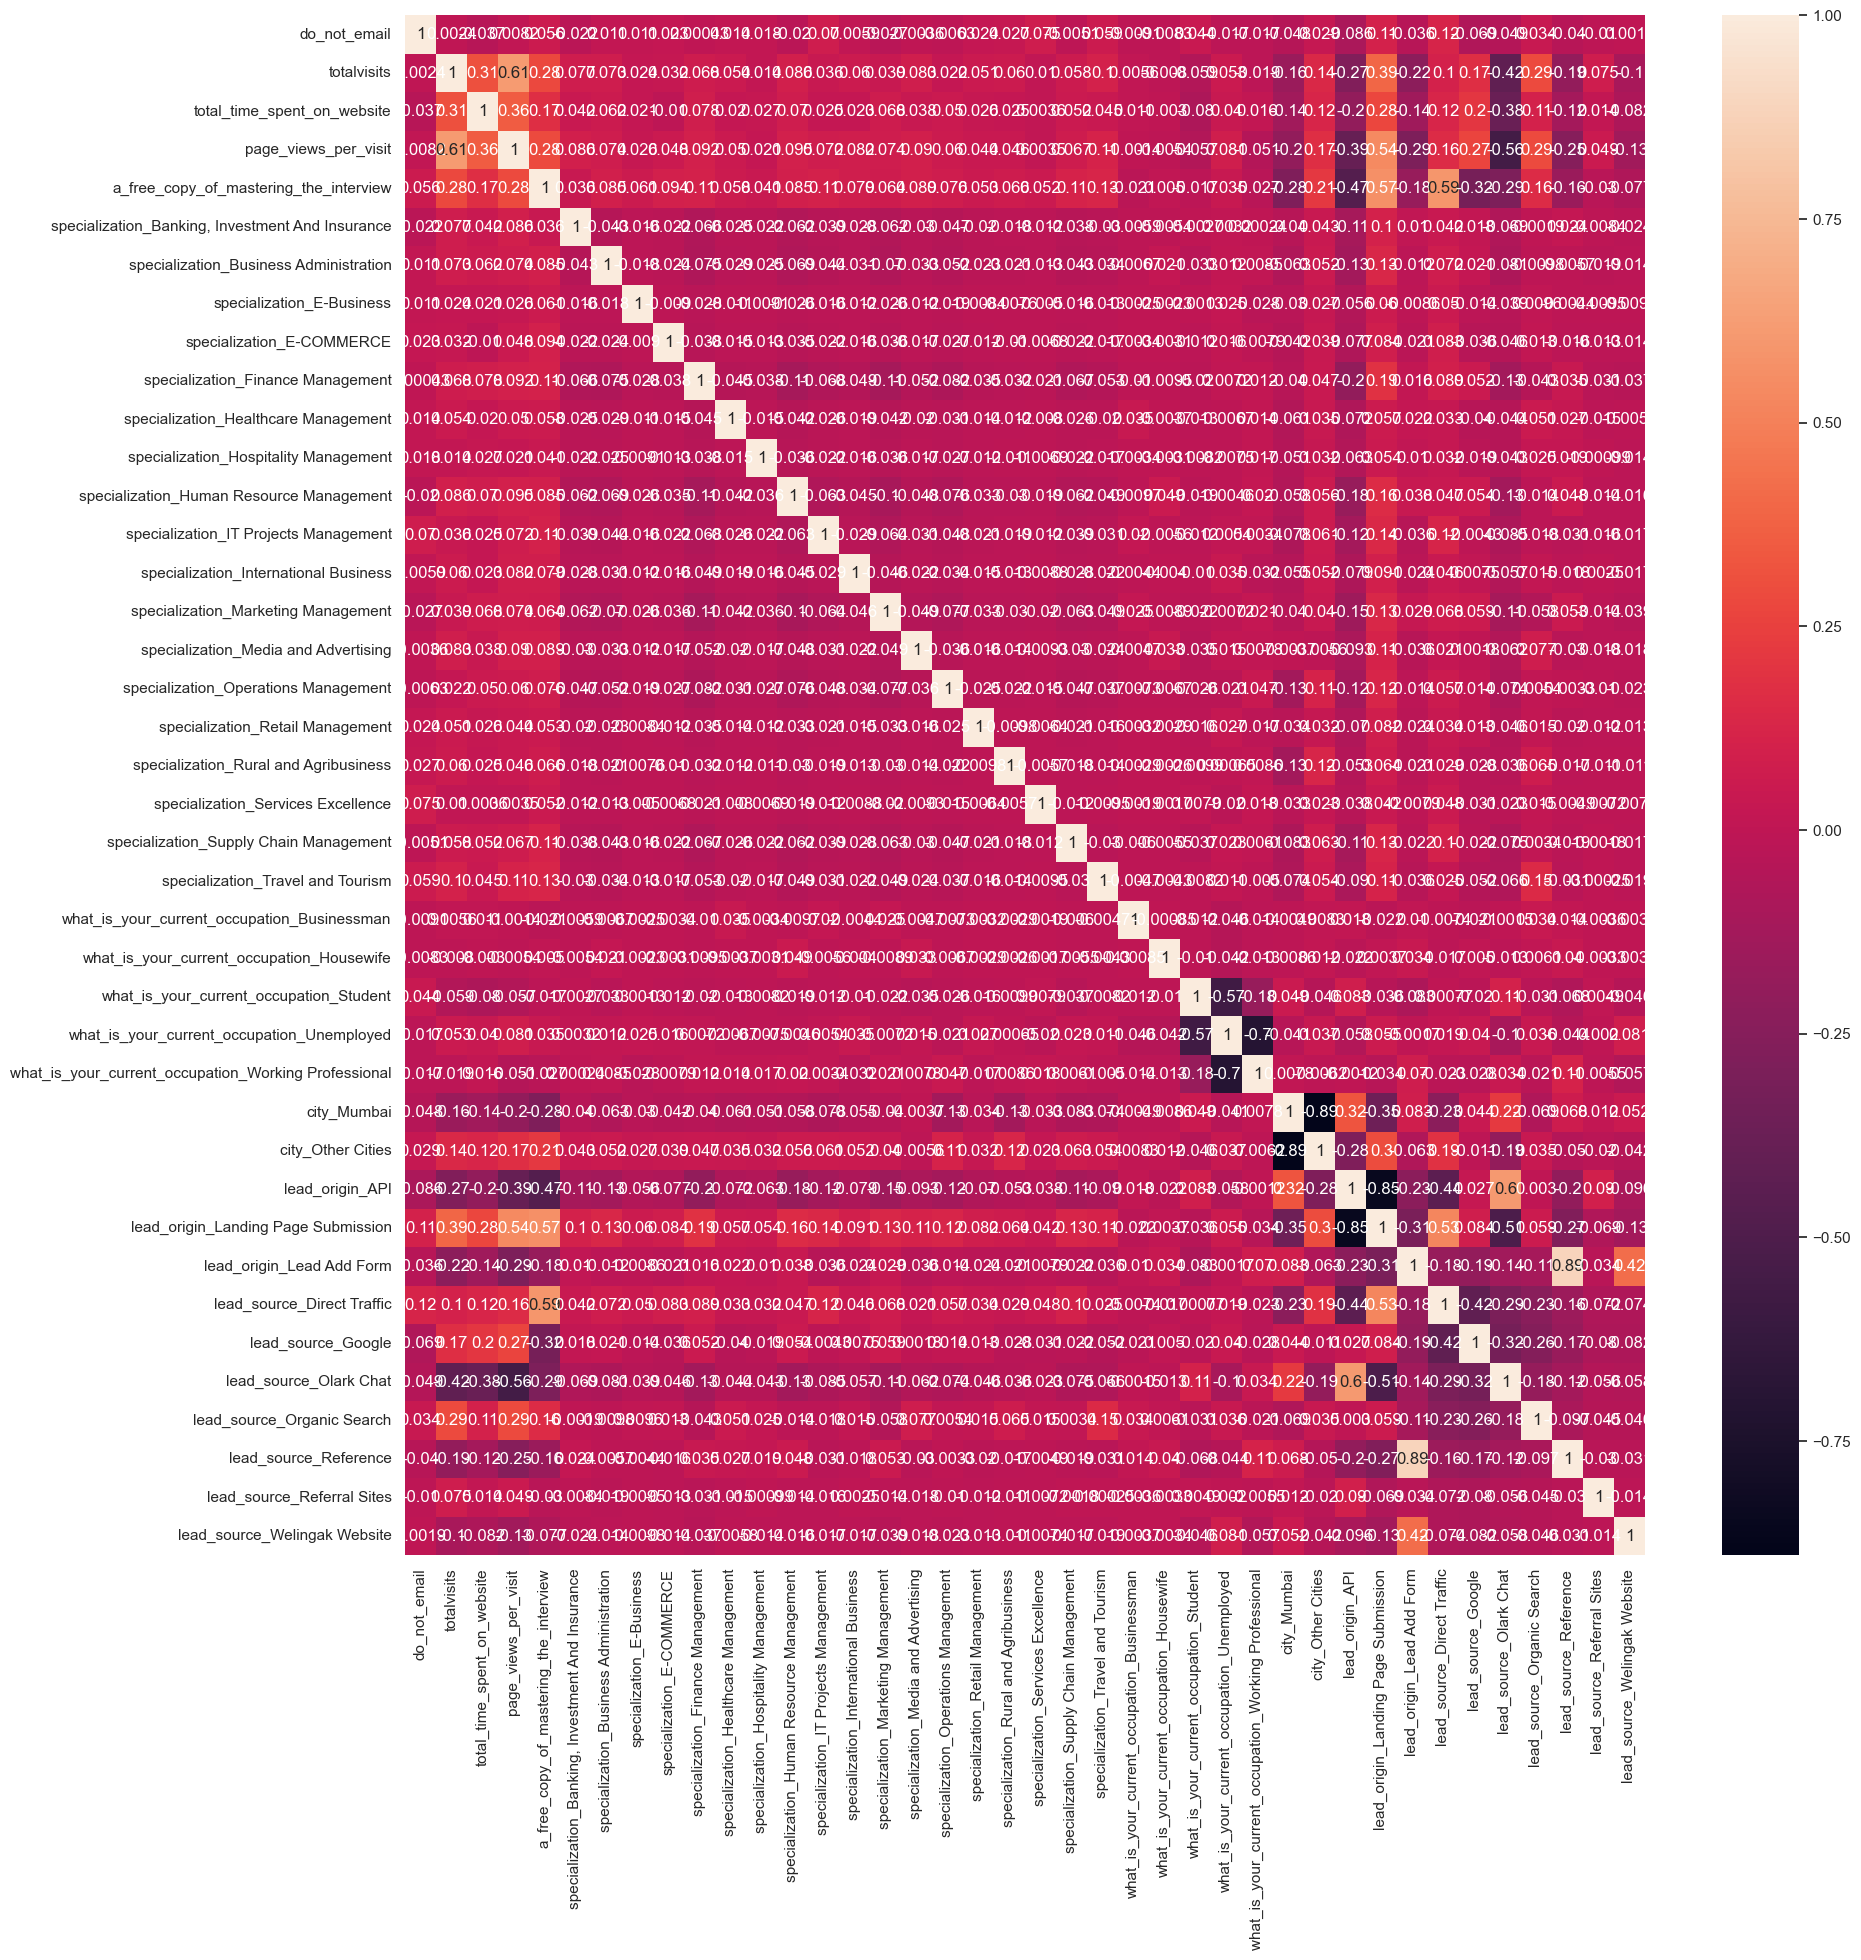

In [118]:
plt.figure(figsize = (20,20))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

Since the number of variables is too high, the heatmap appears extremely cluttered making it very difficult to identify the highly correlated variables. Therefore let's go ahead and build our 1st model study the summary and check the RFE.

## Model Building

In [119]:
import statsmodels.api as sm

In [120]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
print (logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6435
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3050.0
Date:                Mon, 13 Nov 2023   Deviance:                       6099.9
Time:                        20:22:40   Pearson chi2:                 6.76e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3188
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

It can be seen that several p-values are insignificant but before we decide to drop any predictor variable let's check the VIF(variance_inflation_factor)

### Checking VIF

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
31,lead_origin_Landing Page Submission,350.76
30,lead_origin_API,251.30
34,lead_source_Google,160.73
33,lead_source_Direct Traffic,140.41
32,lead_origin_Lead Add Form,110.34
26,what_is_your_current_occupation_Unemployed,107.51
35,lead_source_Olark Chat,95.82
37,lead_source_Reference,80.47
36,lead_source_Organic Search,65.29
27,what_is_your_current_occupation_Working Profes...,28.68


### Feature selection using RFE

In [123]:
logreg = LogisticRegression()

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('totalvisits', False, 17),
 ('total_time_spent_on_website', True, 1),
 ('page_views_per_visit', False, 18),
 ('a_free_copy_of_mastering_the_interview', False, 10),
 ('specialization_Banking, Investment And Insurance', True, 1),
 ('specialization_Business Administration', True, 1),
 ('specialization_E-Business', False, 2),
 ('specialization_E-COMMERCE', True, 1),
 ('specialization_Finance Management', True, 1),
 ('specialization_Healthcare Management', True, 1),
 ('specialization_Hospitality Management', False, 7),
 ('specialization_Human Resource Management', True, 1),
 ('specialization_IT Projects Management', True, 1),
 ('specialization_International Business', False, 4),
 ('specialization_Marketing Management', True, 1),
 ('specialization_Media and Advertising', True, 1),
 ('specialization_Operations Management', True, 1),
 ('specialization_Retail Management', False, 6),
 ('specialization_Rural and Agribusiness', True, 1),
 ('specialization_Services Exc

In [124]:
X_train.columns[rfe.support_]

Index(['do_not_email', 'total_time_spent_on_website',
       'specialization_Banking, Investment And Insurance',
       'specialization_Business Administration', 'specialization_E-COMMERCE',
       'specialization_Finance Management',
       'specialization_Healthcare Management',
       'specialization_Human Resource Management',
       'specialization_IT Projects Management',
       'specialization_Marketing Management',
       'specialization_Media and Advertising',
       'specialization_Operations Management',
       'specialization_Rural and Agribusiness',
       'specialization_Services Excellence',
       'specialization_Supply Chain Management',
       'what_is_your_current_occupation_Housewife',
       'what_is_your_current_occupation_Student',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_source_Welingak Website'],
      dtype='object')

In [125]:
want_col = X_train.columns[rfe.support_]

In [126]:
drop_col = X_train.columns[~rfe.support_]

In [127]:
X_train_new = X_train[want_col]
X_train_new.shape

(6435, 20)

### Model 2

In [128]:
X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
print (logm2.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6435
Model:                            GLM   Df Residuals:                     6414
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3126.9
Date:                Mon, 13 Nov 2023   Deviance:                       6253.7
Time:                        20:22:44   Pearson chi2:                 6.65e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3023
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [129]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,lead_origin_Landing Page Submission,3.81
5,specialization_Finance Management,1.54
18,lead_origin_Lead Add Form,1.51
7,specialization_Human Resource Management,1.46
9,specialization_Marketing Management,1.43
19,lead_source_Welingak Website,1.27
11,specialization_Operations Management,1.25
3,specialization_Business Administration,1.24
8,specialization_IT Projects Management,1.21
14,specialization_Supply Chain Management,1.20


The p-value and VIF to most of the variables are looking good except for the p-value of what_is_your_current_occupation_Housewife which is 0.999. Let's drop that from the feature variable and see the new model.

In [130]:
X_train_new.drop('what_is_your_current_occupation_Housewife', 
                 axis = 'columns',inplace=True)

### Model 3 (Final)

In [131]:
X_train_sm = sm.add_constant(X_train_new)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
print (logm3.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6435
Model:                            GLM   Df Residuals:                     6415
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3130.3
Date:                Mon, 13 Nov 2023   Deviance:                       6260.5
Time:                        20:22:45   Pearson chi2:                 6.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3016
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

The p-values of all the variable looks good. Now let's check the VIF for the same model.

In [132]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,lead_origin_Landing Page Submission,3.81
5,specialization_Finance Management,1.54
17,lead_origin_Lead Add Form,1.50
7,specialization_Human Resource Management,1.45
9,specialization_Marketing Management,1.43
18,lead_source_Welingak Website,1.27
11,specialization_Operations Management,1.25
3,specialization_Business Administration,1.24
8,specialization_IT Projects Management,1.21
14,specialization_Supply Chain Management,1.20


The VIF are all below 5 which means that the final variables selected dont have any multi-colinearity with each other. Before finalise the model lets check how the predictive values look like & the check teh accuracy followed by sensitivity & specifity.

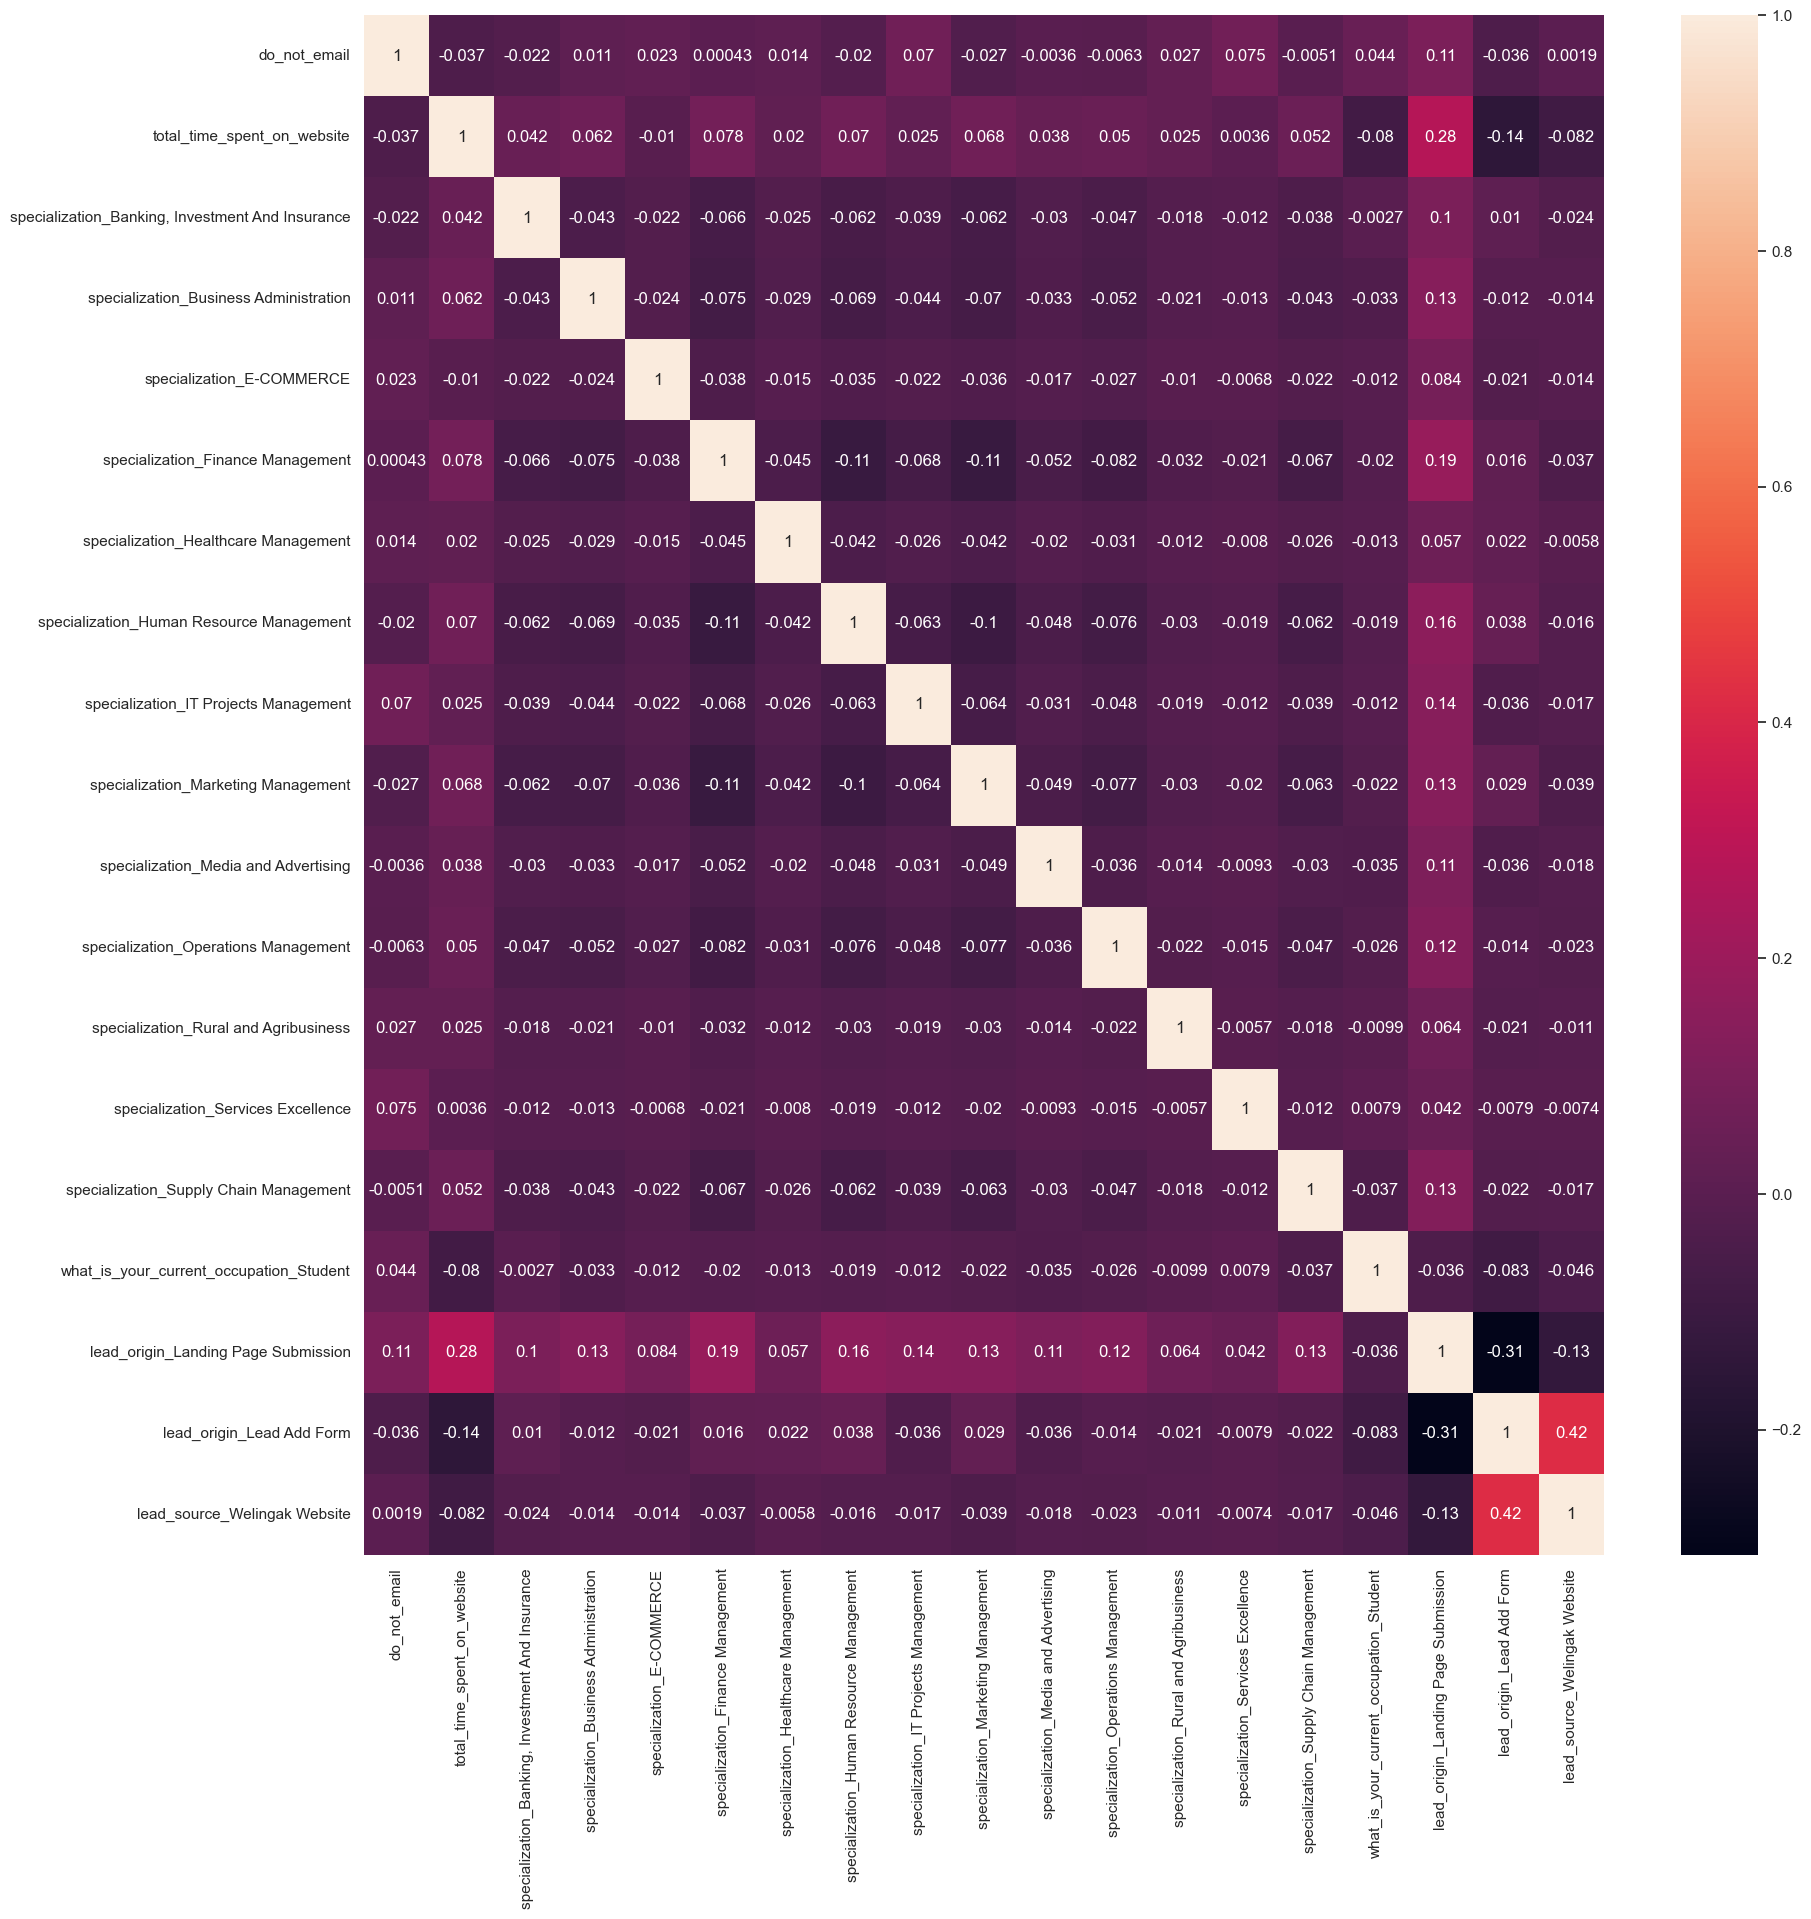

In [133]:
plt.figure(figsize = (20,20))
sns.heatmap(X_train_new.corr(), annot = True)
plt.show()

In [134]:
X_train_new.shape

(6435, 19)

In [135]:
y_train.shape 

(6435,)

In [136]:
# Getting the predicted values on the train set
y_train_pred = logm3.fit().predict(X_train_sm)
y_train_pred[:10]

8287    0.075029
504     0.649778
4612    0.871749
5624    0.154772
1835    0.170314
1756    0.669878
6510    0.170996
9041    0.108259
498     0.107159
6858    0.055313
dtype: float64

In [137]:
# LEts convert the y_train_pred to array 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0750288 , 0.64977764, 0.87174863, 0.1547719 , 0.17031427,
       0.6698781 , 0.1709956 , 0.10825881, 0.10715884, 0.05531349])

**Creating a dataframe with the actual converted values and the predicted probabilities**

In [138]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,CustID
0,0,0.075029,8287
1,0,0.649778,504
2,1,0.871749,4612
3,1,0.154772,5624
4,0,0.170314,1835


**Creating new column 'predicted' with 1 if Convert_Prob > 0.3 else 0 . Considering the Optimal Cutoff Point to be 0.30**

In [139]:
# from sklearn import metrics

y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.30 else 0)

# # Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,CustID,Predicted
0,0,0.075029,8287,0
1,0,0.649778,504,1
2,1,0.871749,4612,1
3,1,0.154772,5624,0
4,0,0.170314,1835,0


In [140]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Predicted )
print(confusion)

[[2973  992]
 [ 553 1917]]


In [141]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

0.7599067599067599


### Metrics beyond simply accuracy

In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7761133603238867

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.7498108448928121

In [145]:
# Calculate false postive rate - predicting converted when customer is not converted
print(FP/ float(TN+FP))

0.2501891551071879


In [146]:
# positive predictive value 
print (TP / float(TP+FP))

0.6589893434169818


In [147]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8431650595575724


### Plotting the ROC Curve

In [148]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [149]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

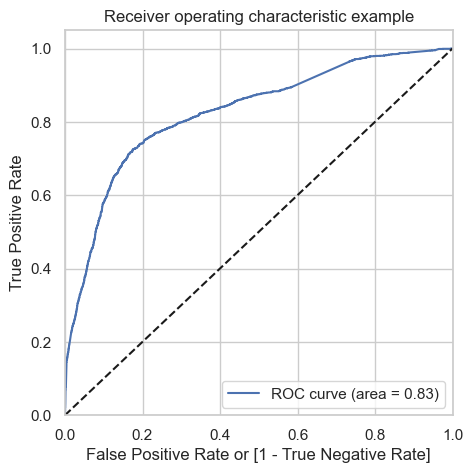

In [150]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.82 indicating a good predictive model.

In [151]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.075029,8287,0,1,0,0,0,0,0,0,0,0,0
1,0,0.649778,504,1,1,1,1,1,1,1,1,0,0,0
2,1,0.871749,4612,1,1,1,1,1,1,1,1,1,1,0
3,1,0.154772,5624,0,1,1,0,0,0,0,0,0,0,0
4,0,0.170314,1835,0,1,1,0,0,0,0,0,0,0,0


In [152]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.485781  0.980162  0.177806
0.2   0.2  0.648174  0.872874  0.508197
0.3   0.3  0.759907  0.776113  0.749811
0.4   0.4  0.786791  0.696356  0.843127
0.5   0.5  0.785082  0.630364  0.881463
0.6   0.6  0.766589  0.534008  0.911475
0.7   0.7  0.738928  0.414980  0.940731
0.8   0.8  0.706760  0.282996  0.970744
0.9   0.9  0.673660  0.160324  0.993443


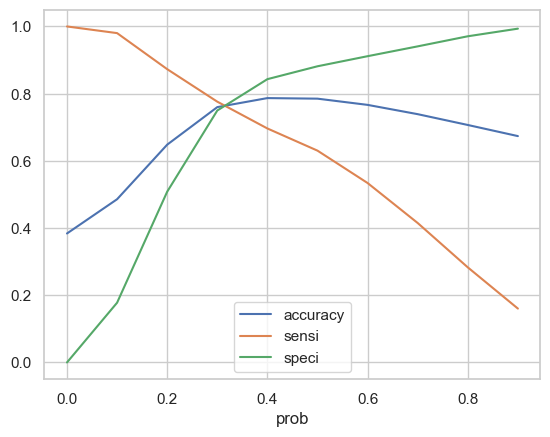

In [153]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Precision and Recall

In [154]:
# Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Predicted )
confusion

array([[2973,  992],
       [ 553, 1917]], dtype=int64)

**Precision**

In [155]:
# TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6589893434169818

**Recall**

In [156]:
# TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7761133603238867

### Precision and recall tradeoff

In [157]:
from sklearn.metrics import precision_recall_curve

In [158]:
y_train_pred_final.Convert, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       0
        ..
 6430    1
 6431    1
 6432    1
 6433    0
 6434    1
 Name: Convert, Length: 6435, dtype: int32,
 0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6430    1
 6431    1
 6432    1
 6433    0
 6434    1
 Name: Predicted, Length: 6435, dtype: int64)

In [159]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

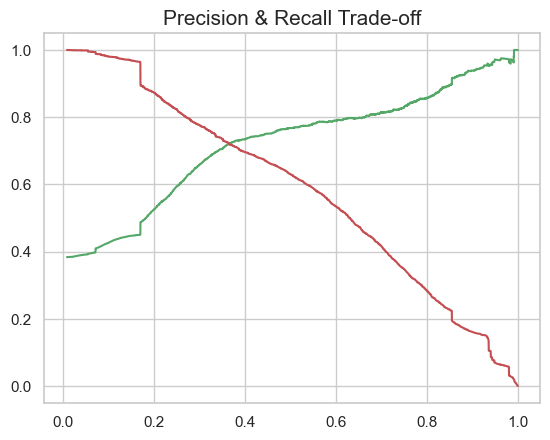

In [160]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision & Recall Trade-off", fontsize = 15)
plt.show()

## Making predictions on the test set

In [161]:
X_test[["totalvisits", "total_time_spent_on_website", "page_views_per_visit"]] = scaler.transform(X_test[["totalvisits", "total_time_spent_on_website", "page_views_per_visit"]])

In [162]:
X_test_new = X_test[X_train_new.columns]

X_test_sm = sm.add_constant(X_test_new)
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2759 entries, 5272 to 499
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   const                                             2759 non-null   float64
 1   do_not_email                                      2759 non-null   int64  
 2   total_time_spent_on_website                       2759 non-null   float64
 3   specialization_Banking, Investment And Insurance  2759 non-null   uint8  
 4   specialization_Business Administration            2759 non-null   uint8  
 5   specialization_E-COMMERCE                         2759 non-null   uint8  
 6   specialization_Finance Management                 2759 non-null   uint8  
 7   specialization_Healthcare Management              2759 non-null   uint8  
 8   specialization_Human Resource Management          2759 non-null   uint8  
 9   specialization_IT

In [163]:
# Making predictions on the test set
y_test_pred = logm3.fit().predict(X_test_sm)
y_test_pred[:10]

5272    0.185042
6750    0.161626
8958    0.334615
7584    0.170314
5896    0.170314
1168    0.709948
2506    0.162264
4016    0.170314
6455    0.178926
7003    0.979394
dtype: float64

In [164]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [165]:
y_pred_1.head()

,0
5272,0.185042
6750,0.161626
8958,0.334615
7584,0.170314
5896,0.170314


In [166]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [167]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [168]:
# Removing the index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [169]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [170]:
y_pred_final.head()

,converted,CustID,0
0,0,5272,0.185042
1,0,6750,0.161626
2,1,8958,0.334615
3,0,7584,0.170314
4,0,5896,0.170314


In [171]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [172]:
y_pred_final.head()

,converted,CustID,Convert_Prob
0,0,5272,0.185042
1,0,6750,0.161626
2,1,8958,0.334615
3,0,7584,0.170314
4,0,5896,0.170314


In [173]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.30 else 0)
y_pred_final['Lead_Score'] = y_pred_final.Convert_Prob.map( lambda x: round(x*100))

In [174]:
y_pred_final['Lead_Score'].describe()

count    2759.000000
mean       38.632113
std        27.801753
min         1.000000
25%        17.000000
50%        27.000000
75%        62.000000
max       100.000000
Name: Lead_Score, dtype: float64

In [175]:
y_pred_final.head(10)

,converted,CustID,Convert_Prob,final_predicted,Lead_Score
0,0,5272,0.185042,0,19
1,0,6750,0.161626,0,16
2,1,8958,0.334615,1,33
3,0,7584,0.170314,0,17
4,0,5896,0.170314,0,17
5,1,1168,0.709948,1,71
6,0,2506,0.162264,0,16
7,0,4016,0.170314,0,17
8,0,6455,0.178926,0,18
9,1,7003,0.979394,1,98


In [176]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.converted, y_pred_final.final_predicted)

0.7553461399057629

In [177]:
confusion2 = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.final_predicted )
confusion2

array([[1261,  437],
       [ 238,  823]], dtype=int64)

In [178]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [179]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7756833176248822

In [180]:
# Let us calculate specificity
TN / float(TN+FP)

0.7426383981154299

**Observation:**

**Train Data:-**

Accuracy: 76% Sensitivity: 77.57% Specificity: 75.20%

**Test Data:-**

Accuracy: 75.71% Sensitivity: 78.03% Specificity: 74.26%

The Model seems to predict the Conversion Rate very well This should help the Sales team prioritize the customers and thereby increase the conversion rate

In [181]:
final_lead_scoring = y_pred_final[["CustID","final_predicted"]]
final_lead_scoring.head()

,CustID,final_predicted
0,5272,0
1,6750,0
2,8958,1
3,7584,0
4,5896,0


In [182]:
#showing the predictions made for leads who converted.
final_lead_scoring[final_lead_scoring["CustID"]==final_lead_scoring.index]['final_predicted']

Series([], Name: final_predicted, dtype: int64)

In [183]:
#saving as dataframe
#final_lead_scoring.to_csv("lead scores2.csv")

In [184]:
Test_csv = pd.read_csv("test.csv")
Test_csv.head()

,Prospect ID,Id,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,718cc1da-cdba-426b-9f53-4367354afe-70,111151,API,Direct Traffic,No,No,3.0,143,5.0,Email Link Clicked,India,NaN,Select,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,NaN,NaN,NaN,NaN,No,No,Email Link Clicked
1,718cc1da-cdba-426b-9f53-4367354afe-71,111152,Landing Page Submission,Direct Traffic,No,No,251.0,54,2.0,Page Visited on Website,India,Supply Chain Management,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Not Sure,No,No,Select,Thane & Outskirts,NaN,NaN,NaN,NaN,No,Yes,Page Visited on Website
2,718cc1da-cdba-426b-9f53-4367354afe-72,111153,API,Olark Chat,No,No,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Worst,No,No,Select,Mumbai,NaN,NaN,NaN,NaN,No,No,Modified
3,718cc1da-cdba-426b-9f53-4367354afe-73,111154,API,Google,No,No,16.0,485,2.0,Email Opened,India,Select,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Lateral Student,Other Cities,NaN,NaN,NaN,NaN,No,No,Email Opened
4,718cc1da-cdba-426b-9f53-4367354afe-74,111155,Landing Page Submission,Google,No,No,4.0,1849,7.0,Olark Chat Conversation,India,Finance Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,NaN,No,No,Select,Other Cities of Maharashtra,NaN,NaN,NaN,NaN,No,No,Modified


In [185]:
Test_csv

,Prospect ID,Id,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,718cc1da-cdba-426b-9f53-4367354afe-70,111151,API,Direct Traffic,No,No,3.0,143,5.0,Email Link Clicked,India,NaN,Select,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,NaN,NaN,NaN,NaN,No,No,Email Link Clicked
1,718cc1da-cdba-426b-9f53-4367354afe-71,111152,Landing Page Submission,Direct Traffic,No,No,251.0,54,2.0,Page Visited on Website,India,Supply Chain Management,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Not Sure,No,No,Select,Thane & Outskirts,NaN,NaN,NaN,NaN,No,Yes,Page Visited on Website
2,718cc1da-cdba-426b-9f53-4367354afe-72,111153,API,Olark Chat,No,No,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Worst,No,No,Select,Mumbai,NaN,NaN,NaN,NaN,No,No,Modified
3,718cc1da-cdba-426b-9f53-4367354afe-73,111154,API,Google,No,No,16.0,485,2.0,Email Opened,India,Select,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Lateral Student,Other Cities,NaN,NaN,NaN,NaN,No,No,Email Opened
4,718cc1da-cdba-426b-9f53-4367354afe-74,111155,Landing Page Submission,Google,No,No,4.0,1849,7.0,Olark Chat Conversation,India,Finance Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,NaN,No,No,Select,Other Cities of Maharashtra,NaN,NaN,NaN,NaN,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,718cc1da-cdba-426b-9f53-4367354afe-2072,113153,Landing Page Submission,Organic Search,Yes,No,7.0,227,6.0,Page Visited on Website,Bahrain,Marketing Management,Advertisements,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,NaN,NaN,NaN,NaN,No,Yes,Modified
2003,718cc1da-cdba-426b-9f53-4367354afe-2073,113154,API,Google,No,No,3.0,382,5.0,Email Opened,India,NaN,Select,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,NaN,NaN,NaN,NaN,No,No,Email Opened
2004,718cc1da-cdba-426b-9f53-4367354afe-2074,113155,API,Google,No,No,2.0,1102,3.0,Email Opened,India,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Modified
2005,718cc1da-cdba-426b-9f53-4367354afe-2075,113156,API,Olark Chat,No,No,0.0,0,0.0,Olark Chat Conversation,NaN,Select,Student of SomeSchool,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,opp hangup,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified


In [186]:
X_train_sm

,const,do_not_email,total_time_spent_on_website,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,what_is_your_current_occupation_Student,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_source_Welingak Website
8287,1.0,1,-0.606735,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
504,1.0,0,2.105098,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4612,1.0,0,2.278700,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5624,1.0,0,0.014575,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1835,1.0,0,-0.891806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1.0,0,-0.891806,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
79,1.0,0,0.396497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8039,1.0,0,-0.891806,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6936,1.0,1,-0.550086,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
